# Movie Recommendation System

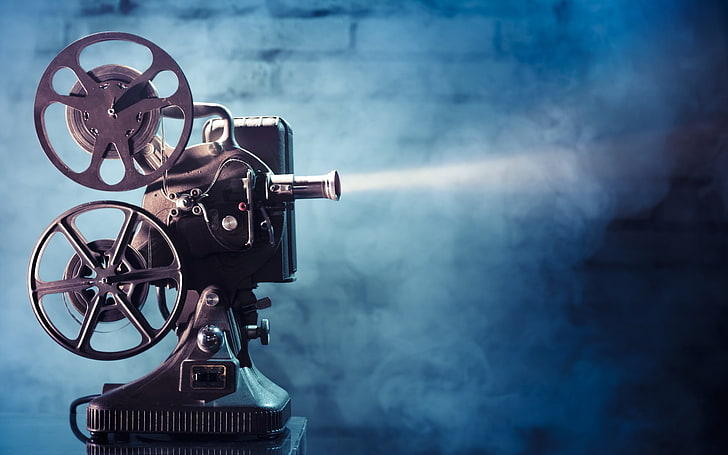

### Gerekli kütüphaneleri yükleme

In [1]:
import numpy as np
import pandas as pd


### Veri yükleme işlemleri

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('users.data', sep='\t', names=column_names)

movie_titles = pd.read_csv("movie_id_titles.csv")


### Verileri birleştirme

In [3]:
df = pd.merge(df, movie_titles, on='item_id')

### Pivot tablosu oluşturma

In [4]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

### Rating istatistikleri

In [5]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['rating_oy_sayisi'] = pd.DataFrame(df.groupby('title')['rating'].count())


### Arayüz

In [15]:
while True:
    print("\nFilm Tavsiye Sistemi\n")
    print("1. Film adı girilmesi ve benzer tavsiyelerin görüntülenmesi")
    print("2. Çıkış")

    choice = input("Seçiminizi yapın (1 veya 2): ")

    if choice == '1':
        movie_name_input = input("İncelemek istediğiniz bir film adı girin: ")
        
        movie_name = movie_titles[movie_titles['title'].str.contains(movie_name_input, case=False)]['title'].iloc[0] if any(movie_titles['title'].str.contains(movie_name_input, case=False)) else None

        if movie_name:
            similar_movies = moviemat.corrwith(moviemat[movie_name])
            similar_movies_corr = pd.DataFrame(similar_movies, columns=['Correlation'])
            similar_movies_corr.dropna(inplace=True)
            similar_movies_corr = similar_movies_corr.join(ratings['rating_oy_sayisi'])
            similar_movies_corr_filtered = similar_movies_corr[similar_movies_corr['rating_oy_sayisi'] > 100].sort_values('Correlation', ascending=False)

            print(f"\n{movie_name} ile Benzer Filmler:\n")
            print(similar_movies_corr_filtered.head(10).to_string(index=True, header=True).replace('title', ''))
        else:
            print("Hatalı film adı. Lütfen doğru bir film adı girin.")

    elif choice == '2':
        break

    else:
        print("Geçersiz bir seçim. Lütfen tekrar deneyin.")


Film Tavsiye Sistemi

1. Film adı girilmesi ve benzer tavsiyelerin görüntülenmesi
2. Çıkış
Seçiminizi yapın (1 veya 2): 1
İncelemek istediğiniz bir film adı girin: Star Wars


D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)



Star Wars (1977) ile Benzer Filmler:

                                                    Correlation  rating_oy_sayisi
                                                                            
Star Wars (1977)                                       1.000000               584
Empire Strikes Back, The (1980)                        0.748353               368
Return of the Jedi (1983)                              0.672556               507
Raiders of the Lost Ark (1981)                         0.536117               420
Austin Powers: International Man of Mystery (1997)     0.377433               130
Sting, The (1973)                                      0.367538               241
Indiana Jones and the Last Crusade (1989)              0.350107               331
Pinocchio (1940)                                       0.347868               101
Frighteners, The (1996)                                0.332729               115
L.A. Confidential (1997)                               0.319065 

D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)



Scream (1996) ile Benzer Filmler:

                                   Correlation  rating_oy_sayisi
                                                           
Scream (1996)                         1.000000               478
Scream 2 (1997)                       0.706028               106
Seven (Se7en) (1995)                  0.435188               236
Starship Troopers (1997)              0.419322               211
Nightmare on Elm Street, A (1984)     0.410796               111
Cape Fear (1991)                      0.397245               171
Interview with the Vampire (1994)     0.386182               137
Natural Born Killers (1994)           0.383332               128
Young Guns (1988)                     0.381230               101
Happy Gilmore (1996)                  0.375235               149

Film Tavsiye Sistemi

1. Film adı girilmesi ve benzer tavsiyelerin görüntülenmesi
2. Çıkış
Seçiminizi yapın (1 veya 2): 1
İncelemek istediğiniz bir film adı girin: Aliens


D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)



Aliens (1986) ile Benzer Filmler:

                                               Correlation  rating_oy_sayisi
                                                                       
Aliens (1986)                                     1.000000               284
Alien (1979)                                      0.474812               291
William Shakespeare's Romeo and Juliet (1996)     0.435624               106
Mask, The (1994)                                  0.432970               129
Good Will Hunting (1997)                          0.410713               198
Nightmare on Elm Street, A (1984)                 0.409035               111
Butch Cassidy and the Sundance Kid (1969)         0.391277               216
Miracle on 34th Street (1994)                     0.385989               101
Ben-Hur (1959)                                    0.385033               124
Craft, The (1996)                                 0.380678               104

Film Tavsiye Sistemi

1. Film adı girilmesi 